<a href="https://colab.research.google.com/github/BenzterBit/DL-QSTP-Codes/blob/master/LogisticReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch 
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms 
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np

TypeError: ignored

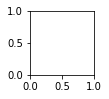

In [0]:
train_dataset= dsets.MNIST(root="/content",train=True , download=True,transform=transforms.ToTensor()) 
test_dataset= dsets.MNIST(root="/content",train=False , download=True,transform=transforms.ToTensor())


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
for i in range(9):
  plt.subplot(331 + i)
  imshow(train_dataset[i][0])
  print(train_dataset[i][1])



In [0]:
batch_size = 100
iter = 12000
loopiter  = iter / (len(train_dataset)/batch_size)

train_loader = torch.utils.data.DataLoader(train_dataset , batch_size = batch_size , shuffle = True)
test_loader = torch.utils.data.DataLoader(test_dataset , batch_size = batch_size , shuffle = False)

import collections
isinstance(train_loader,collections.Iterable)

loopiter

20.0

In [0]:
class LRM(nn.Module):
  def __init__(self, input_dim , output_dim):
    super(LRM, self).__init__()
    self.linear = nn.Linear(input_dim, output_dim)
  
  def forward(self,x):
    out = self.linear(x)
    return out


In [0]:
input_dim = 28*28
output_dim = 10 
print((train_dataset[0][0]).size())

model = LRM(input_dim,output_dim)
if torch.cuda.is_available():
  model.cuda()

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters() , lr = 0.05)



torch.Size([1, 28, 28])


In [0]:
n_iter = 0 
for epochs in range(int(loopiter)):
  for i,(images,labels) in enumerate(train_loader):
    if torch.cuda.is_available():
      images=Variable((images.view(-1,28*28)).cuda())
      labels=Variable(labels.cuda())
    else:
      images=Variable(images.view(-1,28*28))
      labels=Variable(labels) 
      
    optimizer.zero_grad()
    
    optimizer.zero_grad()
    
    outputs= model(images)
    
    loss = criterion(outputs,labels)
    
    loss.backward()
    
    optimizer.step()
    n_iter +=1
    
    if n_iter%500 ==0 : 
      correct = 0
      total = 0
      
      for images,labels in test_loader:
      
        images = Variable(images.view(-1,28*28).cuda())

        outputs = model(images)

        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)

        correct += float((predicted.cpu() == labels.cpu()).sum())
      
      accuracy  = correct*100/total
      
      print("iteration {} loss {} accuracy {}".format(n_iter, loss.data , accuracy ))
      
      
      
    
    

iteration 500 loss 0.33056655526161194 accuracy 88.71
iteration 1000 loss 0.31619882583618164 accuracy 90.11
iteration 1500 loss 0.6049990653991699 accuracy 90.68
iteration 2000 loss 0.398066908121109 accuracy 90.99
iteration 2500 loss 0.452495276927948 accuracy 91.17
iteration 3000 loss 0.42385247349739075 accuracy 91.49
iteration 3500 loss 0.2819804549217224 accuracy 91.62
iteration 4000 loss 0.29754838347435 accuracy 91.55
iteration 4500 loss 0.26130449771881104 accuracy 91.66
iteration 5000 loss 0.34807804226875305 accuracy 91.83
iteration 5500 loss 0.3188542127609253 accuracy 91.81
iteration 6000 loss 0.16613338887691498 accuracy 91.91
iteration 6500 loss 0.26579731702804565 accuracy 91.97
iteration 7000 loss 0.33798980712890625 accuracy 91.97
iteration 7500 loss 0.23961420357227325 accuracy 92.09
iteration 8000 loss 0.17204523086547852 accuracy 92.1
iteration 8500 loss 0.3513328433036804 accuracy 92.13
iteration 9000 loss 0.320561021566391 accuracy 92.03
iteration 9500 loss 0.461